# Week 3 - Data Science Bootcamp Take-Home Assignment

This notebook analyzes data from the NYC Open Data portal. We'll explore, visualize, and extract insights from the dataset.

## Setup and Imports

First, we'll import the necessary libraries for data analysis and visualization.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Loading

We'll load the dataset directly from the NYC Open Data API. The dataset ID `6fi9-q3ta` corresponds to a specific NYC dataset.

The data is loaded as a CSV file and stored in a pandas DataFrame for analysis.


In [34]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


## Question 1: Weekday Pedestrian Counts Analysis

**Task:** Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.


In [35]:
# Convert hour_beginning to datetime and extract day of week
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_of_week'] = df['hour_beginning'].dt.day_name()

# Filter for weekdays only
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['day_of_week'].isin(weekdays)]

# Aggregate pedestrian counts by day
daily_counts = df_weekdays.groupby('day_of_week')['Pedestrians'].sum().reindex(weekdays)

print("Pedestrian counts by weekday:")
print(daily_counts)


/var/folders/rr/yypgmydn1s57skt37s_l5c0c0000gn/T/ipykernel_6626/627593777.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


Pedestrian counts by weekday:
day_of_week
Monday       1481435
Tuesday      1394963
Wednesday    1310900
Thursday     1370880
Friday       1588068
Name: Pedestrians, dtype: int64


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Counts by Day of the Week (Weekdays Only)')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Total Pedestrian Count')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday')])

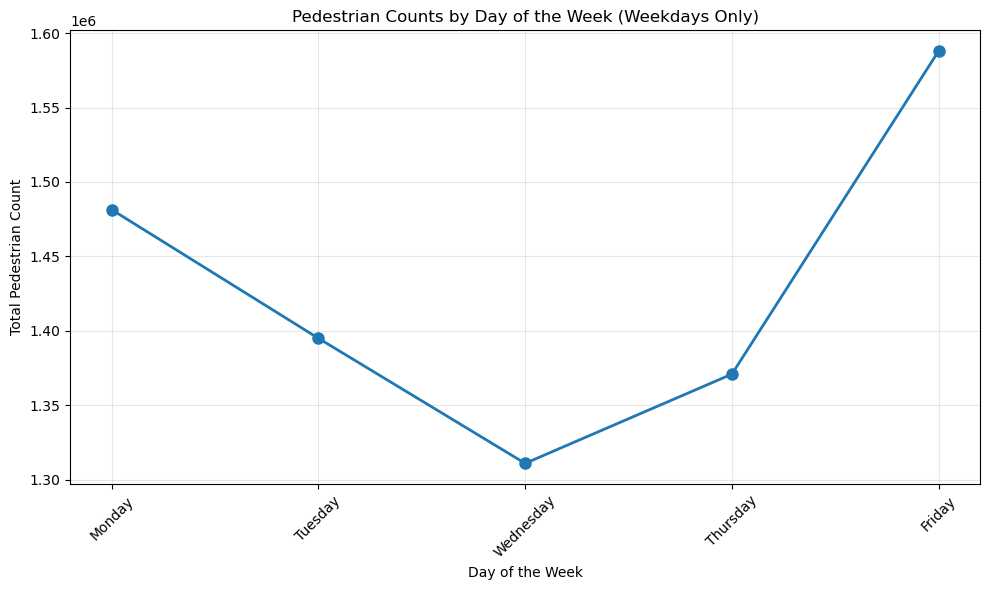

In [36]:
# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(weekdays, daily_counts.values, marker='o', linewidth=2, markersize=8)
plt.title('Pedestrian Counts by Day of the Week (Weekdays Only)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Question 2: Weather Impact Analysis (2019)

**Task:** Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity. Sort the pedestrian count data by weather summary to identify any correlations between weather patterns and pedestrian counts.


In [37]:
# Filter data for 2019 only
df['year'] = df['hour_beginning'].dt.year
df_2019 = df[df['year'] == 2019].copy()

print(f"Total records for 2019: {len(df_2019)}")
print(f"Weather data missing: {df_2019['weather_summary'].isnull().sum()} records")


Total records for 2019: 8761
Weather data missing: 14 records


In [38]:
# Analyze weather conditions and pedestrian counts
df_weather = df_2019.dropna(subset=['weather_summary']).copy()
weather_analysis = df_weather.groupby('weather_summary')['Pedestrians'].agg(['count', 'mean', 'sum']).round(2)
weather_analysis = weather_analysis.sort_values('mean', ascending=False)

print("Weather Conditions vs Pedestrian Activity (2019):")
print(weather_analysis)


Weather Conditions vs Pedestrian Activity (2019):
                     count     mean      sum
weather_summary                             
partly-cloudy-day     1773  1574.09  2790868
clear-day             1413  1382.18  1953025
wind                     4   679.00     2716
cloudy                1813   543.23   984867
rain                   607   229.82   139502
snow                    38   222.63     8460
fog                     22   212.41     4673
sleet                    8   178.25     1426
partly-cloudy-night   1209    52.77    63794
clear-night           1860    33.23    61815


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='weather_summary'>

Text(0.5, 1.0, 'Average Pedestrian Counts by Weather Condition (2019)')

Text(0.5, 0, 'Weather Condition')

Text(0, 0.5, 'Average Pedestrian Count')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'partly-cloudy-day'),
  Text(1, 0, 'clear-day'),
  Text(2, 0, 'wind'),
  Text(3, 0, 'cloudy'),
  Text(4, 0, 'rain'),
  Text(5, 0, 'snow'),
  Text(6, 0, 'fog'),
  Text(7, 0, 'sleet'),
  Text(8, 0, 'partly-cloudy-night'),
  Text(9, 0, 'clear-night')])

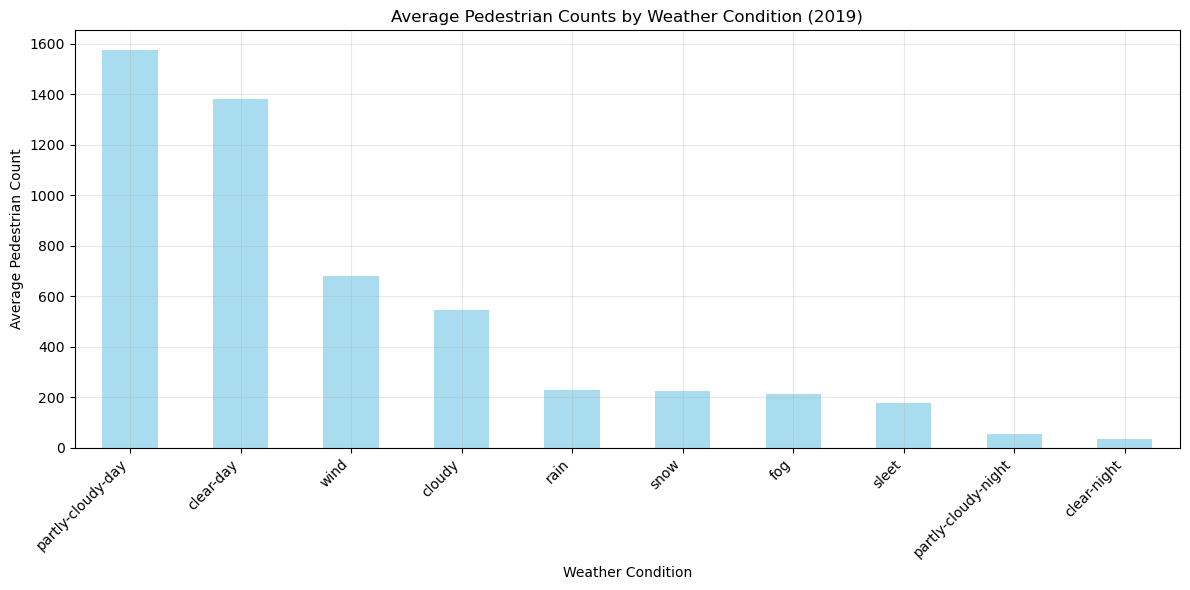

In [39]:
# Create visualization of weather impact
plt.figure(figsize=(12, 6))
weather_analysis['mean'].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Average Pedestrian Counts by Weather Condition (2019)')
plt.xlabel('Weather Condition')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [40]:
# Create correlation matrix for weather variables
correlation_data = df_weather[['Pedestrians', 'temperature', 'precipitation']].copy()

# Create dummy variables for weather conditions
weather_dummies = pd.get_dummies(df_weather['weather_summary'], prefix='weather')
correlation_data = pd.concat([correlation_data, weather_dummies], axis=1)

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()
pedestrian_correlations = correlation_matrix['Pedestrians'].sort_values(ascending=False)

print("Correlations with Pedestrian Counts:")
print("=" * 40)
print(pedestrian_correlations)


Correlations with Pedestrian Counts:
Pedestrians                    1.000000
weather_partly-cloudy-day      0.497585
temperature                    0.358757
weather_clear-day              0.339433
weather_wind                  -0.000196
weather_sleet                 -0.017136
weather_fog                   -0.026531
weather_snow                  -0.034149
weather_cloudy                -0.081933
precipitation                 -0.105432
weather_rain                  -0.138987
weather_partly-cloudy-night   -0.282736
weather_clear-night           -0.378187
Name: Pedestrians, dtype: float64


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix: Weather vs Pedestrian Counts (2019)')

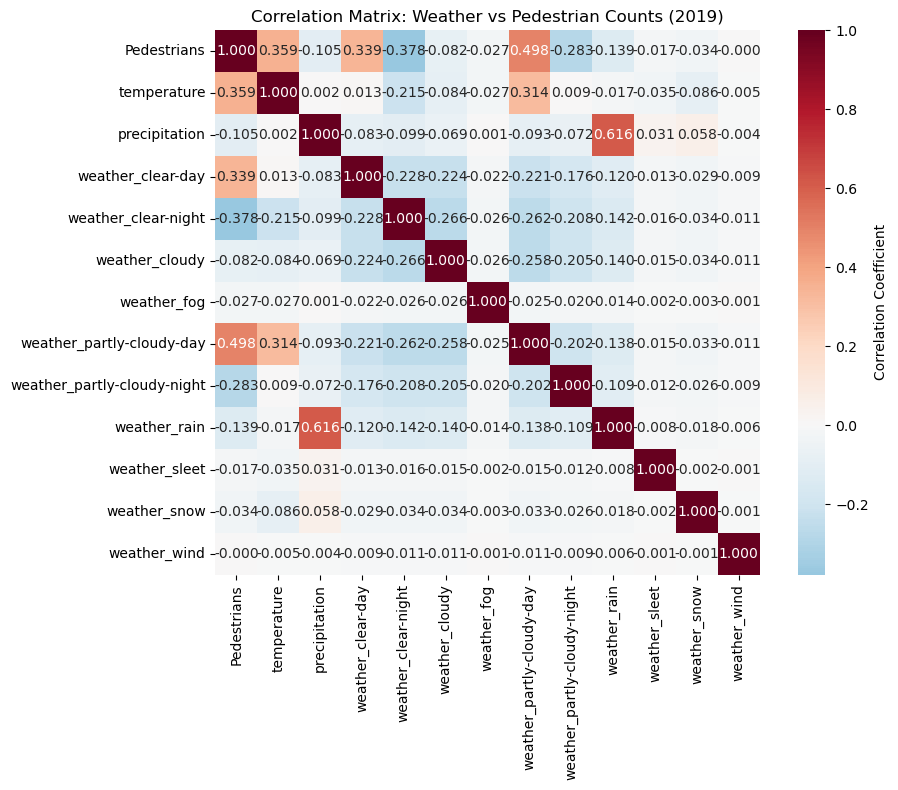

In [41]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))

# Select weather-related correlations
weather_corr = correlation_matrix.loc[
    ['Pedestrians', 'temperature', 'precipitation'] + [col for col in correlation_matrix.columns if col.startswith('weather_')],
    ['Pedestrians', 'temperature', 'precipitation'] + [col for col in correlation_matrix.columns if col.startswith('weather_')]
]

sns.heatmap(weather_corr, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix: Weather vs Pedestrian Counts (2019)')
plt.tight_layout()
plt.show()


## Question 3: Time of Day Analysis

**Task:** Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.


In [42]:
# Custom function to categorize time of day
def categorize_time_of_day(hour):
    """
    Categorize hour into time of day periods
    
    Args:
        hour (int): Hour of the day (0-23)
    
    Returns:
        str: Time period category
    """
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Test the function
print("Testing time categorization function:")
test_hours = [6, 10, 14, 18, 22, 2]
for hour in test_hours:
    print(f"Hour {hour}:00 -> {categorize_time_of_day(hour)}")


Testing time categorization function:
Hour 6:00 -> Morning
Hour 10:00 -> Morning
Hour 14:00 -> Afternoon
Hour 18:00 -> Evening
Hour 22:00 -> Night
Hour 2:00 -> Night


In [43]:
# Extract hour from datetime and create time of day column
df['hour'] = df['hour_beginning'].dt.hour
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

# Analyze pedestrian activity by time of day
time_analysis = df.groupby('time_of_day')['Pedestrians'].agg(['count', 'mean', 'sum']).round(2)
time_analysis = time_analysis.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

print("Pedestrian Activity by Time of Day:")
print("=" * 40)
print(time_analysis)


Pedestrian Activity by Time of Day:
             count     mean      sum
time_of_day                         
Morning       4683   529.70  2480582
Afternoon     3345  1749.48  5852025
Evening       2676   908.87  2432145
Night         5353    50.09   268114


<Axes: xlabel='time_of_day'>

Text(0.5, 1.0, 'Average Pedestrian Counts by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

<Axes: ylabel='sum'>

Text(0.5, 1.0, 'Distribution of Total Pedestrian Counts by Time of Day')

Text(0, 0.5, '')

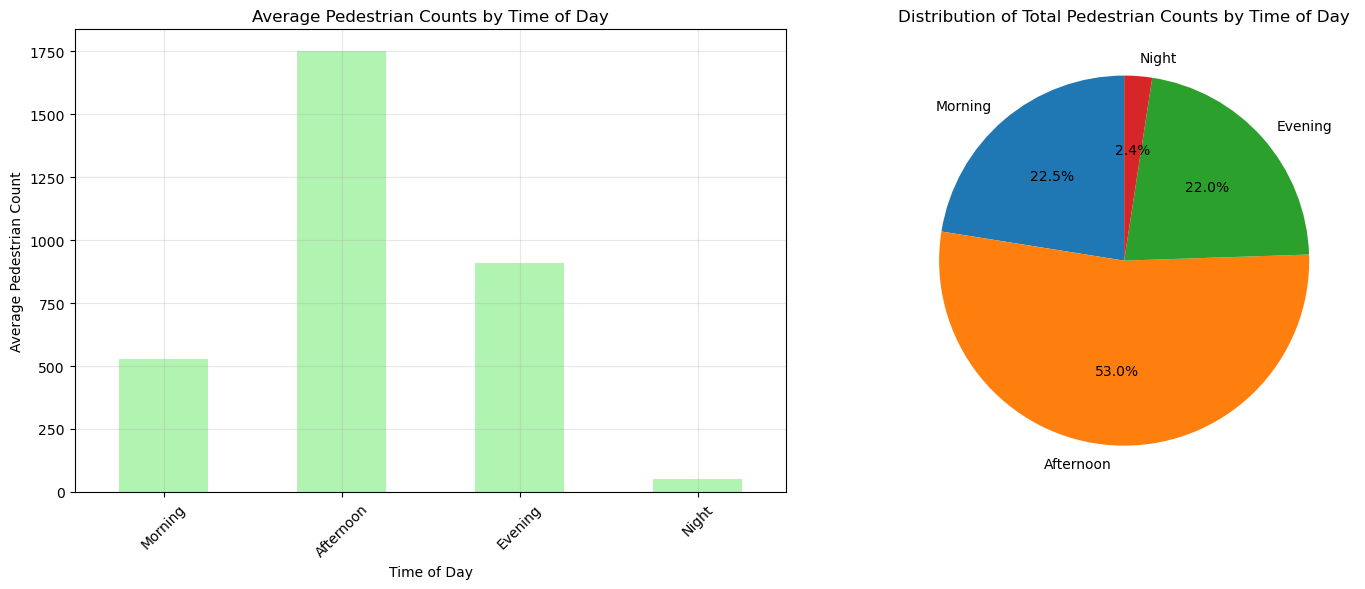

In [44]:
# Create visualizations for time of day analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart of average pedestrian counts by time of day
time_analysis['mean'].plot(kind='bar', ax=ax1, color='lightgreen', alpha=0.7)
ax1.set_title('Average Pedestrian Counts by Time of Day')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Average Pedestrian Count')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Pie chart showing distribution of total pedestrian counts
time_analysis['sum'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribution of Total Pedestrian Counts by Time of Day')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Average Pedestrian Counts by Hour of Day')

Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'Average Pedestrian Count')

([<matplotlib.axis.XTick at 0x17711d7f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

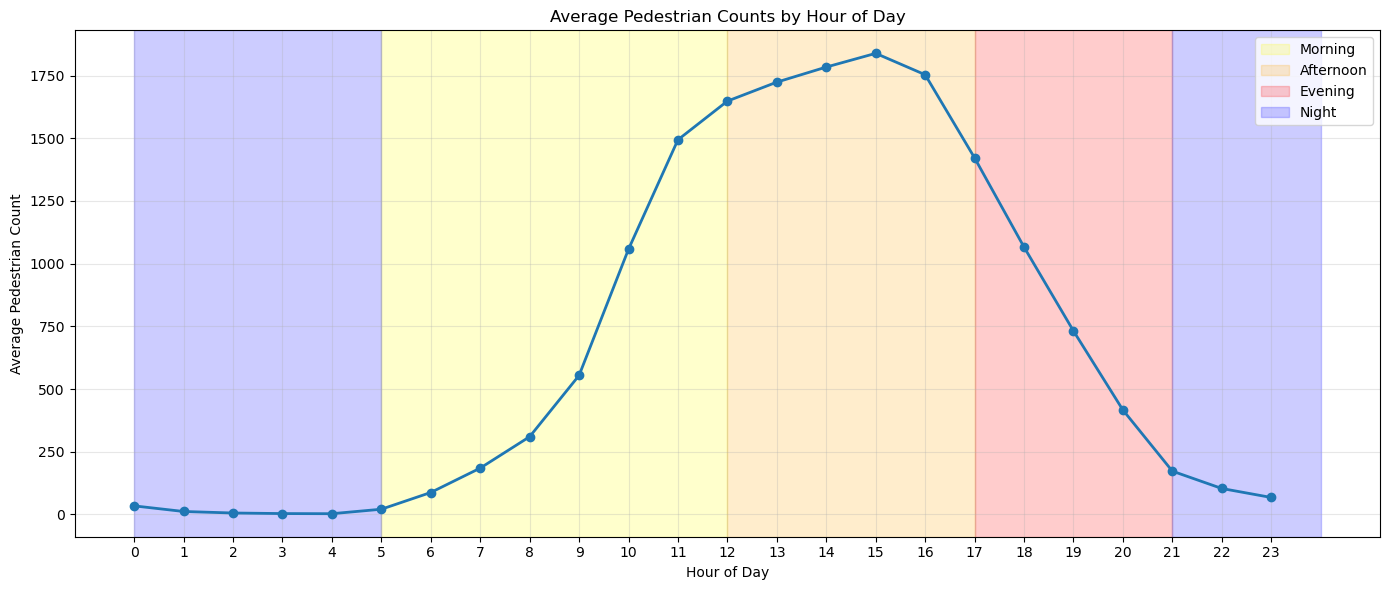


Top 5 Peak Hours:
hour
15    1838.50
14    1783.83
16    1753.31
13    1723.72
12    1648.06
Name: Pedestrians, dtype: float64


In [45]:
# Detailed hourly analysis
hourly_analysis = df.groupby('hour')['Pedestrians'].mean().round(2)

plt.figure(figsize=(14, 6))
plt.plot(hourly_analysis.index, hourly_analysis.values, marker='o', linewidth=2, markersize=6)
plt.title('Average Pedestrian Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pedestrian Count')
plt.grid(True, alpha=0.3)

# Add time period background colors
plt.axvspan(5, 12, alpha=0.2, color='yellow', label='Morning')
plt.axvspan(12, 17, alpha=0.2, color='orange', label='Afternoon')
plt.axvspan(17, 21, alpha=0.2, color='red', label='Evening')
plt.axvspan(0, 5, alpha=0.2, color='blue', label='Night')
plt.axvspan(21, 24, alpha=0.2, color='blue')

plt.legend()
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Show peak hours
peak_hours = hourly_analysis.nlargest(5)
print("\nTop 5 Peak Hours:")
print(peak_hours)
